In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("BRITANNIA.csv")

In [55]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-05,2331.000000,2339.750000,2307.175049,2322.050049,2095.129395,264116
1,2018-01-08,2330.000000,2355.500000,2313.824951,2346.875000,2117.528564,176830
2,2018-01-09,2350.000000,2356.675049,2312.425049,2320.975098,2094.159424,244280
3,2018-01-10,2328.425049,2354.500000,2315.750000,2337.375000,2108.956787,388758
4,2018-01-11,2335.000000,2374.500000,2316.000000,2360.774902,2130.070068,223436
...,...,...,...,...,...,...,...
1230,2022-12-29,4375.000000,4389.750000,4296.549805,4348.299805,4348.299805,244626
1231,2022-12-30,4355.200195,4374.950195,4298.549805,4307.450195,4307.450195,117753
1232,2023-01-02,4379.950195,4379.950195,4275.100098,4292.149902,4292.149902,255314
1233,2023-01-03,4255.100098,4295.649902,4206.299805,4241.850098,4241.850098,496975


In [56]:
df = df.dropna()

In [57]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-05,2331.000000,2339.750000,2307.175049,2322.050049,2095.129395,264116
1,2018-01-08,2330.000000,2355.500000,2313.824951,2346.875000,2117.528564,176830
2,2018-01-09,2350.000000,2356.675049,2312.425049,2320.975098,2094.159424,244280
3,2018-01-10,2328.425049,2354.500000,2315.750000,2337.375000,2108.956787,388758
4,2018-01-11,2335.000000,2374.500000,2316.000000,2360.774902,2130.070068,223436
...,...,...,...,...,...,...,...
1230,2022-12-29,4375.000000,4389.750000,4296.549805,4348.299805,4348.299805,244626
1231,2022-12-30,4355.200195,4374.950195,4298.549805,4307.450195,4307.450195,117753
1232,2023-01-02,4379.950195,4379.950195,4275.100098,4292.149902,4292.149902,255314
1233,2023-01-03,4255.100098,4295.649902,4206.299805,4241.850098,4241.850098,496975


In [58]:
df.set_index('Date',drop=True,inplace=True) 

In [59]:
df = df[["Open" , "Close"]]

In [60]:
df

,Open,Close
Date,,
2018-01-05,2331.000000,2322.050049
2018-01-08,2330.000000,2346.875000
2018-01-09,2350.000000,2320.975098
2018-01-10,2328.425049,2337.375000
2018-01-11,2335.000000,2360.774902
...,...,...
2022-12-29,4375.000000,4348.299805
2022-12-30,4355.200195,4307.450195
2023-01-02,4379.950195,4292.149902


<ipython-input-61-78abec09f3d8>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


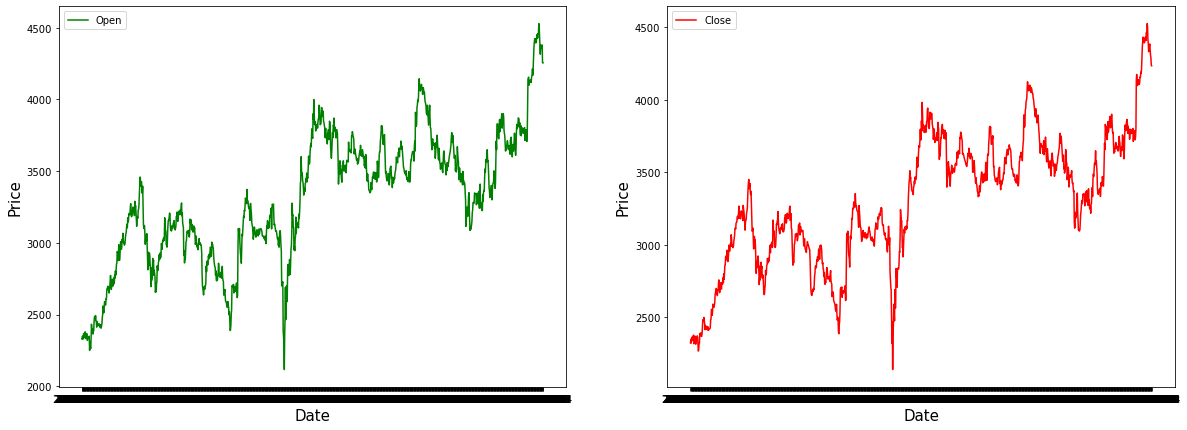

In [61]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()
ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()
fg.show()

In [63]:
df

,Open,Close
Date,,
2018-01-05,2331.000000,2322.050049
2018-01-08,2330.000000,2346.875000
2018-01-09,2350.000000,2320.975098
2018-01-10,2328.425049,2337.375000
2018-01-11,2335.000000,2360.774902
...,...,...
2022-12-29,4375.000000,4348.299805
2022-12-30,4355.200195,4307.450195
2023-01-02,4379.950195,4292.149902


In [64]:
df1=df.reset_index()['Close']

In [65]:
df1

0       2322.050049
1       2346.875000
2       2320.975098
3       2337.375000
4       2360.774902
           ...     
1230    4348.299805
1231    4307.450195
1232    4292.149902
1233    4241.850098
1234    4235.000000
Name: Close, Length: 1235, dtype: float64

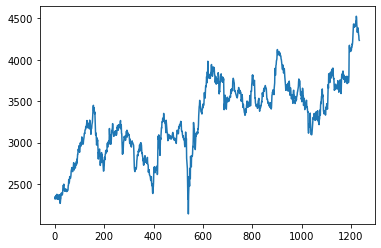

In [66]:
plt.plot(df1)

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [68]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [69]:
training_size,test_size

(802, 433)

In [70]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [71]:
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [72]:
print(X_train.shape), print(y_train.shape)

(651, 150)
(651,)


(None, None)

In [73]:
print(X_test.shape), print(ytest.shape)

(282, 150)
(282,)


(None, None)

In [74]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [75]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [79]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(10,activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 150, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 150, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 51,321
Trainable params: 51,321
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
11/11 [==============================] - 19s 690ms/step - loss: 0.0788 - val_loss: 0.0111
Epoch 2/100
11/11 [==============================] - 5s 474ms/step - loss: 0.0119 - val_loss: 0.0096
Epoch 3/100
11/11 [==============================] - 3s 251ms/step - loss: 0.0076 - val_loss: 0.0190
Epoch 4/100
11/11 [==============================] - 3s 252ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 5/100
11/11 [==============================] - 3s 257ms/step - loss: 0.0053 - val_loss: 0.0075
Epoch 6/100
11/11 [==============================] - 3s 256ms/step - loss: 0.0047 - val_loss: 0.0065
Epoch 7/100
11/11 [==============================] - 3s 243ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 8/100
11/11 [==============================] - 3s 237ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 9/100
11/11 [==============================] - 3s 237ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 10/100
11/11 [==============================] - 3s 236ms/step - loss: 0.0039 - val_l

11/11 [==============================] - 2s 203ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 82/100
11/11 [==============================] - 2s 204ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 83/100
11/11 [==============================] - 2s 208ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 84/100
11/11 [==============================] - 2s 203ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 85/100
11/11 [==============================] - 2s 197ms/step - loss: 0.0010 - val_loss: 8.3899e-04
Epoch 86/100
11/11 [==============================] - 2s 193ms/step - loss: 9.5883e-04 - val_loss: 0.0013
Epoch 87/100
11/11 [==============================] - 2s 218ms/step - loss: 0.0011 - val_loss: 8.6731e-04
Epoch 88/100
11/11 [==============================] - 2s 205ms/step - loss: 0.0010 - val_loss: 9.0304e-04
Epoch 89/100
11/11 [==============================] - 2s 195ms/step - loss: 9.3031e-04 - val_loss: 8.3308e-04
Epoch 90/100
11/11 [==============================] - 2s 202ms/step - l

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.5.0'

In [82]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [83]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [84]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

3187.7419529742892

In [85]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3647.3644498243057

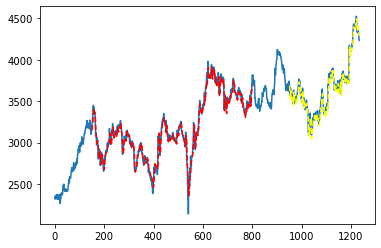

In [93]:
### Plotting 
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot,color='red', linestyle='dashed')
plt.plot(testPredictPlot,color='yellow', linestyle='dashed')
plt.show()

In [94]:
len(test_data)

433

In [97]:
x_input=test_data[283:].reshape(1,-1)
x_input.shape

(1, 150)

In [98]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [99]:
temp_input

[0.5917359215415069,
 0.602516069766008,
 0.5828187298751327,
 0.5668892087811704,
 0.5214660599517192,
 0.5122767890662615,
 0.5063110759711492,
 0.5120047098471779,
 0.5112301727337857,
 0.5212149335729653,
 0.5222824001773702,
 0.5243756328423218,
 0.49996862202370573,
 0.5194356858077563,
 0.5406610445166861,
 0.5299226994044438,
 0.5331881628754486,
 0.5574278586766291,
 0.5531367317134782,
 0.5429216947674739,
 0.5301320226709391,
 0.5561927693495873,
 0.6055722099705175,
 0.6541770109096549,
 0.635819421979069,
 0.7087476275123051,
 0.7001444207456736,
 0.7029493320030288,
 0.693927478703407,
 0.6646641270747428,
 0.664873450341238,
 0.6850312398773625,
 0.7163250682183898,
 0.6853661776174348,
 0.6905992592798139,
 0.7077010111798293,
 0.7190881763634863,
 0.7257655680510019,
 0.7318149899390322,
 0.6988465754660435,
 0.7186904826708255,
 0.7248864718727625,
 0.7378853646673921,
 0.7191509323160746,
 0.6908922913392271,
 0.6832938977928128,
 0.6854080832980939,
 0.6490067877682

In [138]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<30):
    
    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.29332477 0.29332447 0.29332414 0.29332381 0.29332355 0.29332328
 0.29332298 0.29332265 0.29332244 0.29332221 0.29332194 0.2933217
 0.29332149 0.29332128 0.2933211  0.29332092 0.29332078 0.29332057
 0.29332048 0.29332036 0.29332021 0.29332009 0.29331997 0.29331991
 0.29331985 0.29331982 0.2933197  0.29331964 0.29331961 0.29331952
 0.29331952 0.29331949 0.29331952 0.29331952 0.29331952 0.29331955
 0.29331961 0.29331961 0.29331958 0.29331964 0.29331967 0.2933197
 0.2933197  0.29331973 0.29331976 0.29331976 0.29331976 0.29331979
 0.29331979 0.29331982 0.29331985 0.29331988 0.29331994 0.29331997
 0.29331997 0.29332    0.29332003 0.29332003 0.29332    0.29332
 0.29331997 0.29332    0.29331997 0.29331997 0.29331997 0.29331997
 0.29332    0.29331997 0.29332003 0.29332003 0.29332003 0.29332
 0.29332    0.29332    0.29332003 0.29332006 0.29332006 0.29332009
 0.29332006 0.29332012 0.29332009 0.29332018 0.29332015 0.29332015
 0.29332021 0.29332021 0.29332018 0.29332027 0.29332024 0.

4 day output [[0.29332036]]
5 day input [0.29332328 0.29332298 0.29332265 0.29332244 0.29332221 0.29332194
 0.2933217  0.29332149 0.29332128 0.2933211  0.29332092 0.29332078
 0.29332057 0.29332048 0.29332036 0.29332021 0.29332009 0.29331997
 0.29331991 0.29331985 0.29331982 0.2933197  0.29331964 0.29331961
 0.29331952 0.29331952 0.29331949 0.29331952 0.29331952 0.29331952
 0.29331955 0.29331961 0.29331961 0.29331958 0.29331964 0.29331967
 0.2933197  0.2933197  0.29331973 0.29331976 0.29331976 0.29331976
 0.29331979 0.29331979 0.29331982 0.29331985 0.29331988 0.29331994
 0.29331997 0.29331997 0.29332    0.29332003 0.29332003 0.29332
 0.29332    0.29331997 0.29332    0.29331997 0.29331997 0.29331997
 0.29331997 0.29332    0.29331997 0.29332003 0.29332003 0.29332003
 0.29332    0.29332    0.29332    0.29332003 0.29332006 0.29332006
 0.29332009 0.29332006 0.29332012 0.29332009 0.29332018 0.29332015
 0.29332015 0.29332021 0.29332021 0.29332018 0.29332027 0.29332024
 0.29332027 0.29332027 0.

9 day output [[0.29332036]]
10 day input [0.29332194 0.2933217  0.29332149 0.29332128 0.2933211  0.29332092
 0.29332078 0.29332057 0.29332048 0.29332036 0.29332021 0.29332009
 0.29331997 0.29331991 0.29331985 0.29331982 0.2933197  0.29331964
 0.29331961 0.29331952 0.29331952 0.29331949 0.29331952 0.29331952
 0.29331952 0.29331955 0.29331961 0.29331961 0.29331958 0.29331964
 0.29331967 0.2933197  0.2933197  0.29331973 0.29331976 0.29331976
 0.29331976 0.29331979 0.29331979 0.29331982 0.29331985 0.29331988
 0.29331994 0.29331997 0.29331997 0.29332    0.29332003 0.29332003
 0.29332    0.29332    0.29331997 0.29332    0.29331997 0.29331997
 0.29331997 0.29331997 0.29332    0.29331997 0.29332003 0.29332003
 0.29332003 0.29332    0.29332    0.29332    0.29332003 0.29332006
 0.29332006 0.29332009 0.29332006 0.29332012 0.29332009 0.29332018
 0.29332015 0.29332015 0.29332021 0.29332021 0.29332018 0.29332027
 0.29332024 0.29332027 0.29332027 0.2933203  0.29332039 0.29332039
 0.29332045 0.2933204

14 day output [[0.29332033]]
15 day input [0.29332092 0.29332078 0.29332057 0.29332048 0.29332036 0.29332021
 0.29332009 0.29331997 0.29331991 0.29331985 0.29331982 0.2933197
 0.29331964 0.29331961 0.29331952 0.29331952 0.29331949 0.29331952
 0.29331952 0.29331952 0.29331955 0.29331961 0.29331961 0.29331958
 0.29331964 0.29331967 0.2933197  0.2933197  0.29331973 0.29331976
 0.29331976 0.29331976 0.29331979 0.29331979 0.29331982 0.29331985
 0.29331988 0.29331994 0.29331997 0.29331997 0.29332    0.29332003
 0.29332003 0.29332    0.29332    0.29331997 0.29332    0.29331997
 0.29331997 0.29331997 0.29331997 0.29332    0.29331997 0.29332003
 0.29332003 0.29332003 0.29332    0.29332    0.29332    0.29332003
 0.29332006 0.29332006 0.29332009 0.29332006 0.29332012 0.29332009
 0.29332018 0.29332015 0.29332015 0.29332021 0.29332021 0.29332018
 0.29332027 0.29332024 0.29332027 0.29332027 0.2933203  0.29332039
 0.29332039 0.29332045 0.29332045 0.29332048 0.29332048 0.29332048
 0.29332045 0.2933204

22 day output [[0.29332036]]
23 day input [0.29331991 0.29331985 0.29331982 0.2933197  0.29331964 0.29331961
 0.29331952 0.29331952 0.29331949 0.29331952 0.29331952 0.29331952
 0.29331955 0.29331961 0.29331961 0.29331958 0.29331964 0.29331967
 0.2933197  0.2933197  0.29331973 0.29331976 0.29331976 0.29331976
 0.29331979 0.29331979 0.29331982 0.29331985 0.29331988 0.29331994
 0.29331997 0.29331997 0.29332    0.29332003 0.29332003 0.29332
 0.29332    0.29331997 0.29332    0.29331997 0.29331997 0.29331997
 0.29331997 0.29332    0.29331997 0.29332003 0.29332003 0.29332003
 0.29332    0.29332    0.29332    0.29332003 0.29332006 0.29332006
 0.29332009 0.29332006 0.29332012 0.29332009 0.29332018 0.29332015
 0.29332015 0.29332021 0.29332021 0.29332018 0.29332027 0.29332024
 0.29332027 0.29332027 0.2933203  0.29332039 0.29332039 0.29332045
 0.29332045 0.29332048 0.29332048 0.29332048 0.29332045 0.29332048
 0.29332045 0.29332042 0.29332045 0.29332042 0.29332042 0.29332042
 0.29332042 0.29332039 

In [139]:
day_new=np.arange(1,151)
day_pred=np.arange(151,181)

In [131]:
len(df1)

1235

In [140]:
scaler.inverse_transform(lst_output)

array([[2838.48967073],
       [2838.48967073],
       [2838.48967073],
       [2838.48967073],
       [2838.48974191],
       [2838.48967073],
       [2838.48974191],
       [2838.48967073],
       [2838.48959954],
       [2838.48974191],
       [2838.48974191],
       [2838.48967073],
       [2838.48974191],
       [2838.48967073],
       [2838.48967073],
       [2838.4898131 ],
       [2838.4898131 ],
       [2838.48974191],
       [2838.48974191],
       [2838.4898131 ],
       [2838.48974191],
       [2838.48974191],
       [2838.48974191],
       [2838.4898131 ],
       [2838.4898131 ],
       [2838.48974191],
       [2838.48988429],
       [2838.48988429],
       [2838.4898131 ],
       [2838.4898131 ]])

In [133]:
df.shape

(1235, 2)

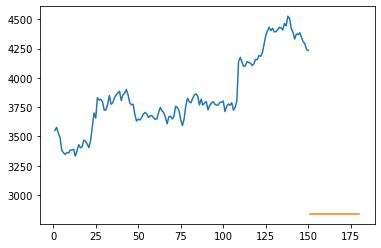

In [141]:
plt.plot(day_new,scaler.inverse_transform(df1[1085:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

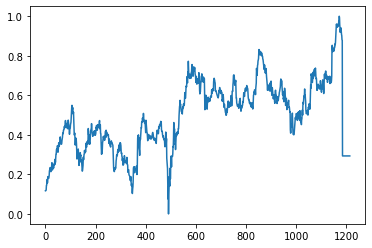

In [142]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[50:])

In [143]:
df3=scaler.inverse_transform(df3).tolist()

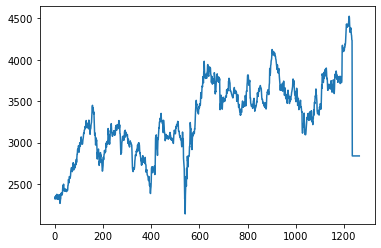

In [144]:
plt.plot(df3)
